# [1차] 프렌즈4블록
- `유형` 2018 KAKAO BLIND RECRUITMENT


- `문제 설명`


블라인드 공채를 통과한 신입 사원 라이언은 신규 게임 개발 업무를 맡게 되었다. 이번에 출시할 게임 제목은 "프렌즈4블록".
같은 모양의 카카오프렌즈 블록이 2×2 형태로 4개가 붙어있을 경우 사라지면서 점수를 얻는 게임이다.

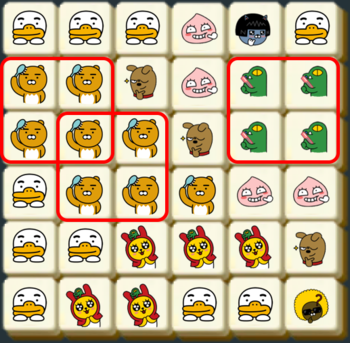

만약 판이 위와 같이 주어질 경우, 라이언이 2×2로 배치된 7개 블록과 콘이 2×2로 배치된 4개 블록이 지워진다. 같은 블록은 여러 2×2에 포함될 수 있으며, 지워지는 조건에 만족하는 2×2 모양이 여러 개 있다면 한꺼번에 지워진다.

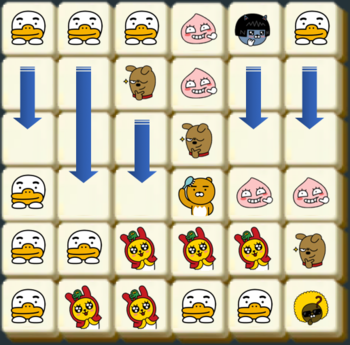

블록이 지워진 후에 위에 있는 블록이 아래로 떨어져 빈 공간을 채우게 된다.

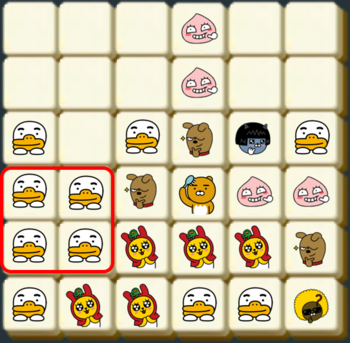

만약 빈 공간을 채운 후에 다시 2×2 형태로 같은 모양의 블록이 모이면 다시 지워지고 떨어지고를 반복하게 된다.

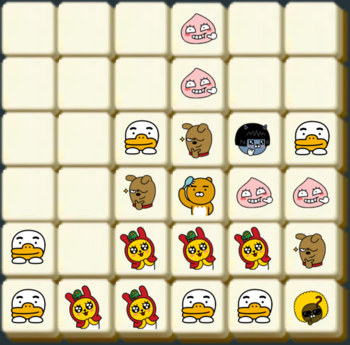

위 초기 배치를 문자로 표시하면 아래와 같다.

TTTANT
RRFACC
RRRFCC
TRRRAA
TTMMMF
TMMTTJ

각 문자는 라이언(R), 무지(M), 어피치(A), 프로도(F), 네오(N), 튜브(T), 제이지(J), 콘(C)을 의미한다

입력으로 블록의 첫 배치가 주어졌을 때, 지워지는 블록은 모두 몇 개인지 판단하는 프로그램을 제작하라.


- `입력`
    - 입력으로 판의 높이 `m`, 폭 `n`과 판의 배치 정보 `board`가 들어온다.
    - 2 ≦ `n`, `m` ≦ 30
    - `board`는 길이 `n`인 문자열 `m`개의 배열로 주어진다. 블록을 나타내는 문자는 대문자 A에서 Z가 사용된다.
    - ex1) 4, 5, ["CCBDE", "AAADE", "AAABF", "CCBBF"]
    - ex2) 6, 6, ["TTTANT", "RRFACC", "RRRFCC", "TRRRAA", "TTMMMF", "TMMTTJ"]


- `출력`
    - ex1) 14
    - ex2) 15
    
    
- `참고`
    - [[알고리즘] 카카오 - [1차] 프렌즈4블록 Python](https://lsh424.tistory.com/85)

In [21]:
# TRY 1) 반례 testcase가 필요해..

import numpy as np

def solution(m, n, board):
    
    board = [list(i) for i in board]
    for _ in range(1000):  

        # 1. 연속으로 동일한 2개의 블록 정보 리스트
        s = []
        for i in range(m):
            for j in range(n-1):
                if board[i][j] == board[i][j+1]:
                    s.append(board[i][j]+board[i][j+1]+str(i)+str(j)+str(j+1))

        # 2. 동일한 2x2를 만족하는 블록 정보 리스트 
        l = ['9']
        for i in s:
            if str(i[:2]).isalpha():
                c = str(i[:2]) + str(int(i[2])+1) + str(i[3:])
                if c in s:
                    l.append((i[2], i[3:]))
                    l.append((c[2], c[3:]))
        if len(l) != 1:
            l.remove('9')
        else:
            break

        # 3. 삭제된 블록 -> 0으로 표시
        for i in l:
            row = int(i[0])
            col = i[1]
            for j in range(2):
                board[row][int(col[j])] = '0'

        # 4. 삭제된 블록을 제외한 나머지 블록 array
        arr = []
        for i in range(n):
            temp = []
            for j in range(m):
                if board[j][i] != '0':
                    temp.append(board[j][i])
            arr.append(temp)

        if len(l) == 0:
            break

        check = 0
        for i in range(len(arr)):
            if len(arr[i]) != 0:
                check += 1
        if check == 0:
            return m*n

        # 5. 블록 밑으로 끌어내리기
        board = []
        for i in arr:
            board.append(['0'] * (m-len(i)) + i)
        board = np.array(board).transpose()
    
    cnt = 0
    for row in board:
        for i in range(len(row)):
            if not row[i].isalpha():
                cnt+=1
    return cnt

In [22]:
print(solution(4, 5, ["CCBDE", "AAADE", "AAABF", "CCBBF"])) # 14
print(solution(6, 6, ["TTTANT", "RRFACC", "RRRFCC", "TRRRAA", "TTMMMF", "TMMTTJ"])) # 15
print(solution(2, 4, ['baab', 'baab'])) # 4
print(solution(2, 2, ['aa', 'aa'])) # 4
print(solution(6, 2, ["DD", "CC", "AA", "AA", "CC", "DD"]))# 12
print(solution(6, 6, ['AABBEE','AAAEEE','VAAEEV','AABBEE','AACCEE','VVCCEE'])) # 32
print(solution(8, 2, ["FF", "AA", "CC", "AA", "AA", "CC", "DD", "FF"])) # 8
print(solution(2, 2, ["FF", "AA", "CC", "AA", "AA", "CC", "DD", "FF"])) # 0
print(solution(6, 6, ["OXXOXX", "OXXXXX", 'OOXXXX', 'OXXOXX', 'OXXXXX', 'OOXXXX'])) # 30
print(solution(7, 2, ["AA", "BB", "AA", "BB", "ZZ", "ZZ", "CC"])) # 4
print(solution(8, 5, ["HGNHU", "CRSHV", "UKHVL", "MJHQB", "GSHOT", "MQMJJ", "AGJKK", "QULKK"])) # 8
print(solution(6, 5, ["CCZXZ", "CCZXZ", "XXZXZ", "AAZAA", "AAAAA", "ZAAXX"])) # 15
print(solution(5, 6, ['AAAAAA','BBAATB','BBAATB','JJJTAA','JJJTAA'])) # 24
print(solution(6, 6, ['IIIIOO', 'IIIOOO', 'IIIOOI', 'IOOIII', 'OOOIII', 'OOIIII'])) # 32
print(solution(8, 2, ["CC", "BB", "AA", "BB", "BB", "AA", "BB", "CC"] )) # 16

14
15
4
4
12
32
8
0
30
4
8
15
24
32
16


In [17]:
# SOL 1) set, deque 활용한 코드 - 상당히 직관적이고 간결함!

import collections 

def solution(m, n, board):
    answer = 0
    check_set = set()
    board = [list(i) for i in board]

    # 2x2 블록 조건에 맞으면 집합에 해당 인덱스를 추가하는 함수
    def check(b):
        for i in range(m-1):
            for j in range(n-1):
                if b[i][j] == b[i+1][j] == b[i][j+1] == b[i+1][j+1] != '0':
                    check_set.add((i,j))
                    check_set.add((i+1,j))
                    check_set.add((i,j+1))
                    check_set.add((i+1,j+1))

    # 격자를 재배열 하는 함수 
    def arrange(b):
        for j in range(len(b[0])):
            q = collections.deque([])

            for i in range(len(b)-1,-1,-1):
                if b[i][j] == '0':
                    q.append((i,j)) 
                else:
                    if q:
                        qi, qj  = q.popleft()
                        b[qi][qj] = b[i][j]
                        b[i][j] = '0'
                        q.append((i, j)) 

    while True:
        check(board)
        if check_set:
            for i, j in check_set:
                board[i][j] = '0'
            answer += len(check_set)
            arrange(board)
            check_set.clear()
        else:
            break
    return answer

In [19]:
print(solution(4, 5, ["CCBDE", "AAADE", "AAABF", "CCBBF"])) # 14
print(solution(6, 6, ["TTTANT", "RRFACC", "RRRFCC", "TRRRAA", "TTMMMF", "TMMTTJ"])) # 15
print(solution(2, 4, ['baab', 'baab'])) # 4
print(solution(2, 2, ['aa', 'aa'])) # 4
print(solution(6, 2, ["DD", "CC", "AA", "AA", "CC", "DD"]))# 12
print(solution(6, 6, ['AABBEE','AAAEEE','VAAEEV','AABBEE','AACCEE','VVCCEE'])) # 32
print(solution(8, 2, ["FF", "AA", "CC", "AA", "AA", "CC", "DD", "FF"])) # 8
print(solution(2, 2, ["FF", "AA", "CC", "AA", "AA", "CC", "DD", "FF"])) # 0
print(solution(6, 6, ["OXXOXX", "OXXXXX", 'OOXXXX', 'OXXOXX', 'OXXXXX', 'OOXXXX'])) # 30
print(solution(7, 2, ["AA", "BB", "AA", "BB", "ZZ", "ZZ", "CC"])) # 4
print(solution(8, 5, ["HGNHU", "CRSHV", "UKHVL", "MJHQB", "GSHOT", "MQMJJ", "AGJKK", "QULKK"])) # 8
print(solution(6, 5, ["CCZXZ", "CCZXZ", "XXZXZ", "AAZAA", "AAAAA", "ZAAXX"])) # 15
print(solution(5, 6, ['AAAAAA','BBAATB','BBAATB','JJJTAA','JJJTAA'])) # 24
print(solution(6, 6, ['IIIIOO', 'IIIOOO', 'IIIOOI', 'IOOIII', 'OOOIII', 'OOIIII'])) # 32
print(solution(8, 2, ["CC", "BB", "AA", "BB", "BB", "AA", "BB", "CC"] )) # 16

14
15
4
4
12
32
8
0
30
4
8
15
24
32
16
